'Before Filtering the shape (1309765, 21)'

'After Filter the shape (70525, 21)'

'Desire Filter shape (70525, 21)'

Schema([('Survey_Name', Int16),
        ('Year', Int16),
        ('FSU_Serial_No', Int16),
        ('Sector', Int16),
        ('State', Int16),
        ('NSS_Region', Int16),
        ('District', Int16),
        ('Stratum', Int16),
        ('Sub_stratum', Int16),
        ('Panel', Int16),
        ('Sub_sample', Int16),
        ('FOD_Sub_Region', Int16),
        ('Sample_SU_No', Int16),
        ('Sample_Sub_Division_No', Int16),
        ('Second_Stage_Stratum_No', Int16),
        ('Sample_Household_No', Int16),
        ('Questionnaire_No', Int16),
        ('Level', Int16),
        ('Survey_Code', Int16),
        ('Reason_for_Substitution_Code', Int16),
        ('Multiplier', Int16)])

Percentage of null values 
Survey_Name ---> 100.00%
Year ---> 0.00%
FSU_Serial_No ---> 59.74%
Sector ---> 0.00%
State ---> 0.00%
NSS_Region ---> 0.00%
District ---> 0.00%
Stratum ---> 0.00%
Sub_stratum ---> 0.00%
Panel ---> 0.00%
Sub_sample ---> 0.00%
FOD_Sub_Region ---> 0.00%
Sample_SU_No ---> 0.00%
Sample_Sub_Division_No ---> 99.69%
Second_Stage_Stratum_No ---> 0.00%
Sample_Household_No ---> 0.00%
Questionnaire_No ---> 100.00%
Level ---> 0.00%
Survey_Code ---> 0.00%
Reason_for_Substitution_Code ---> 95.04%
Multiplier ---> 89.81%


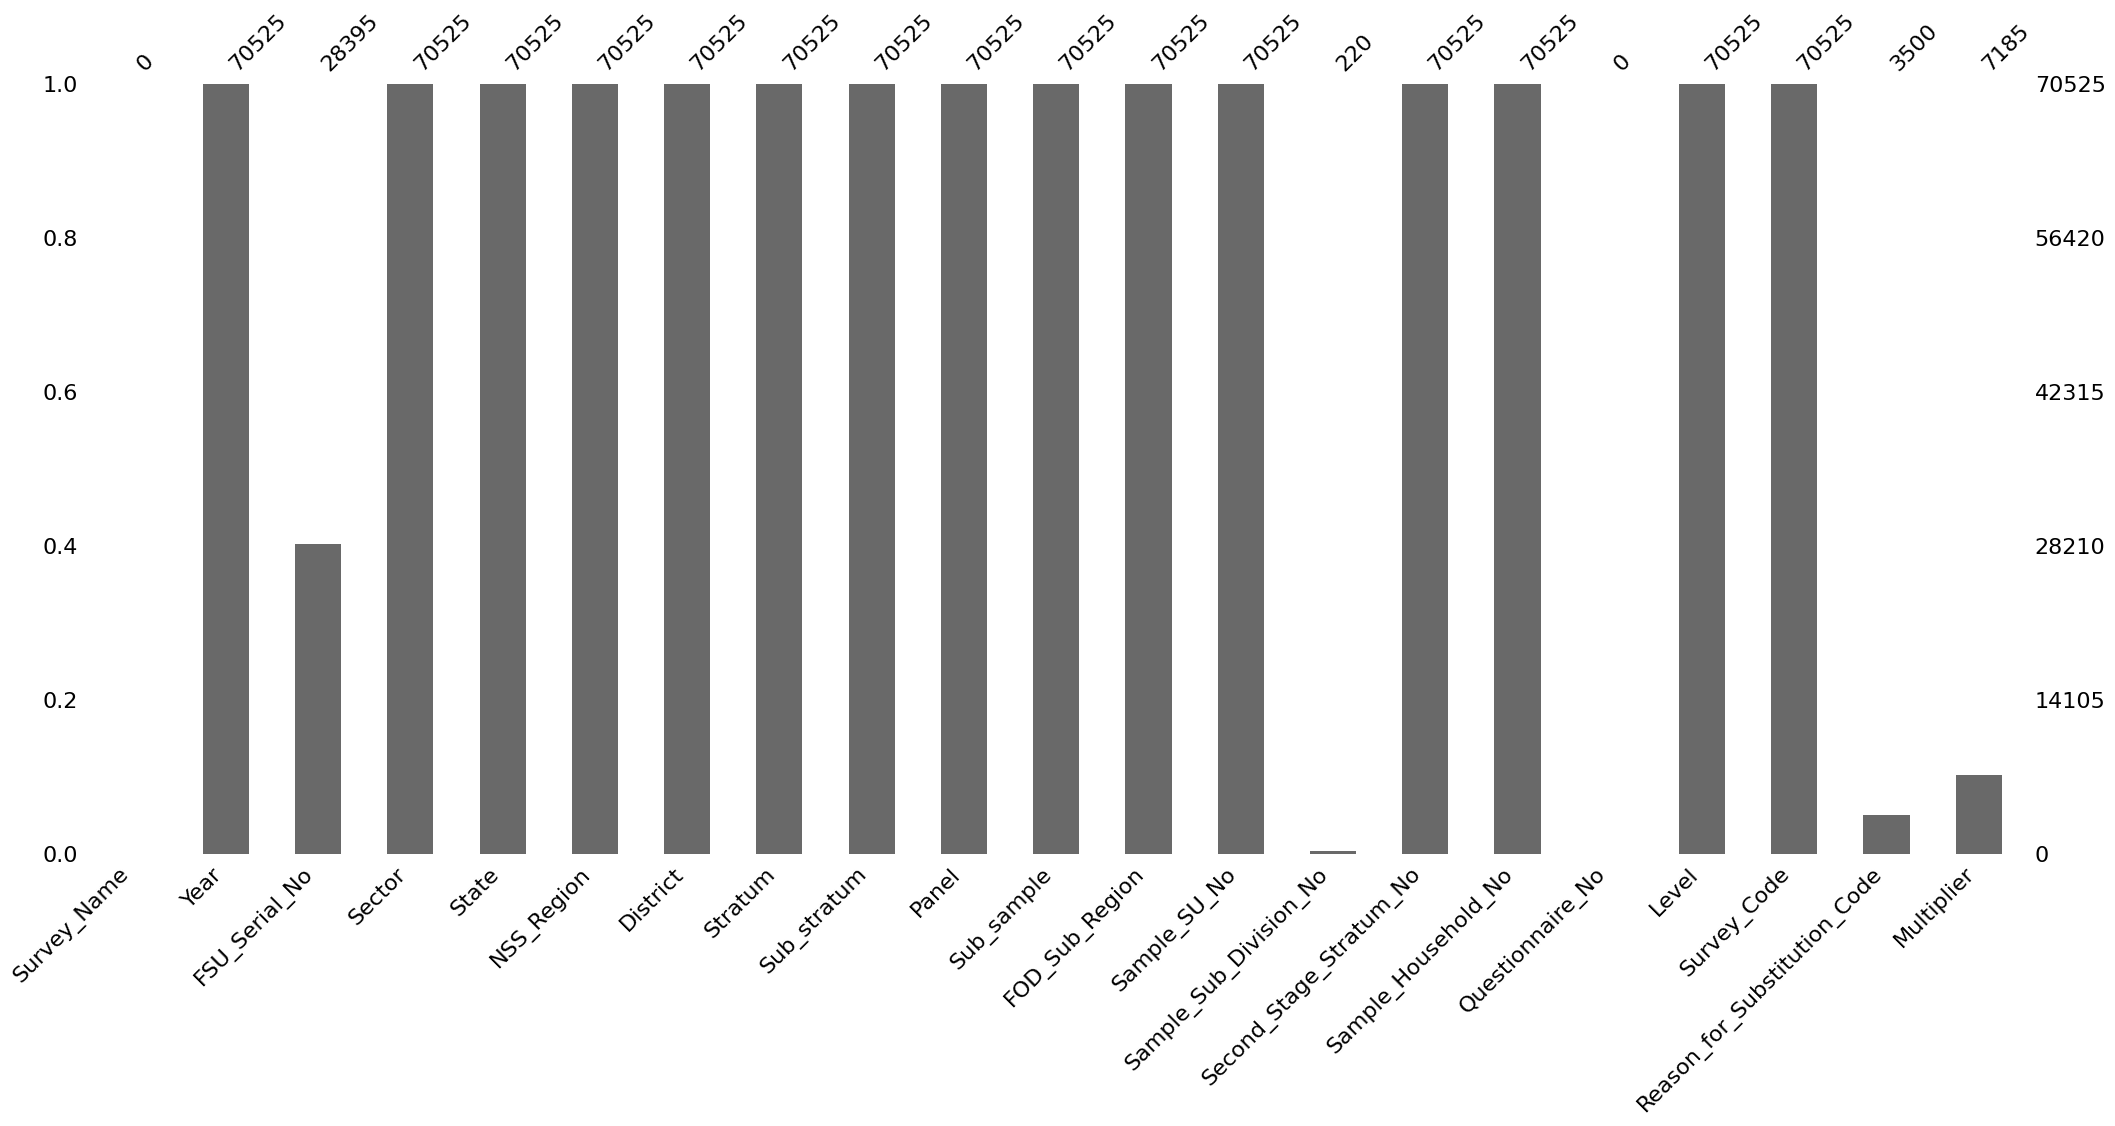

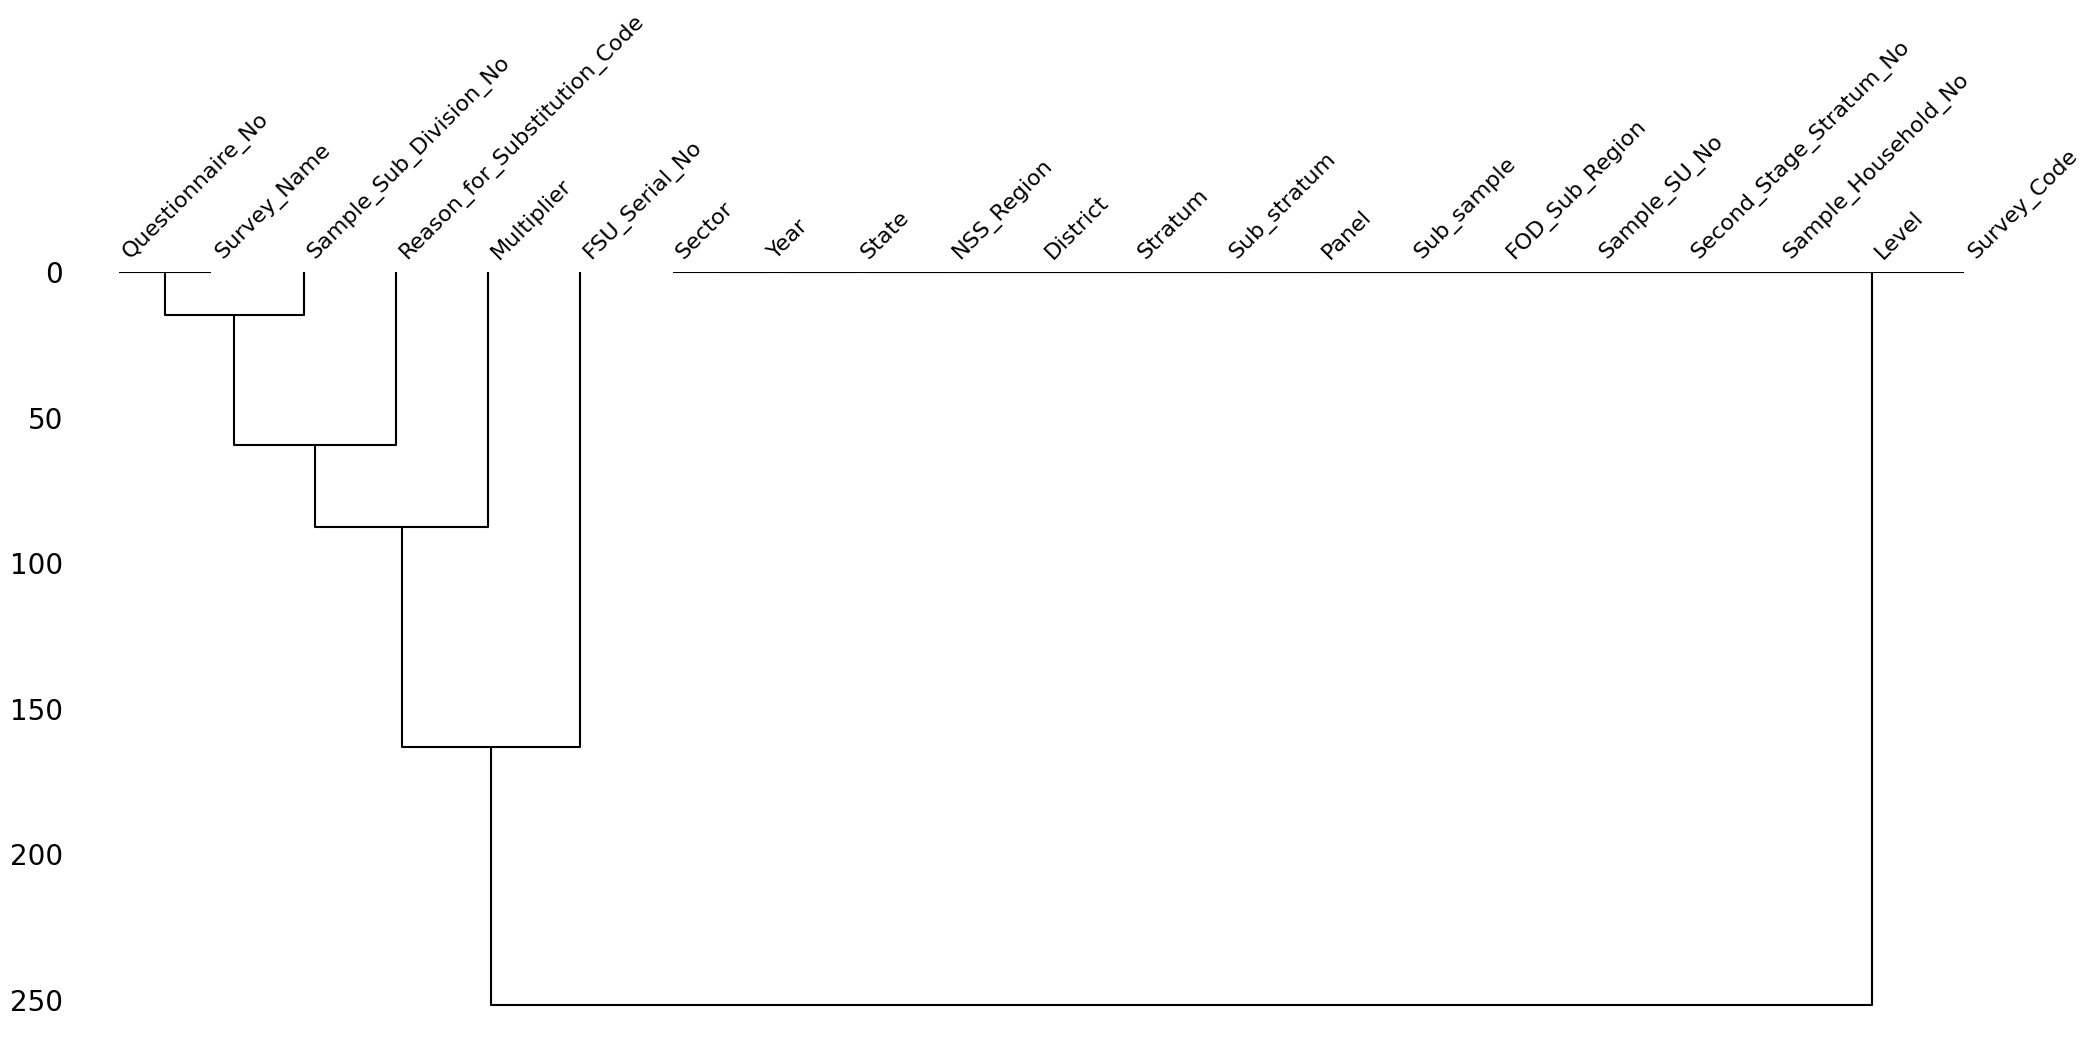

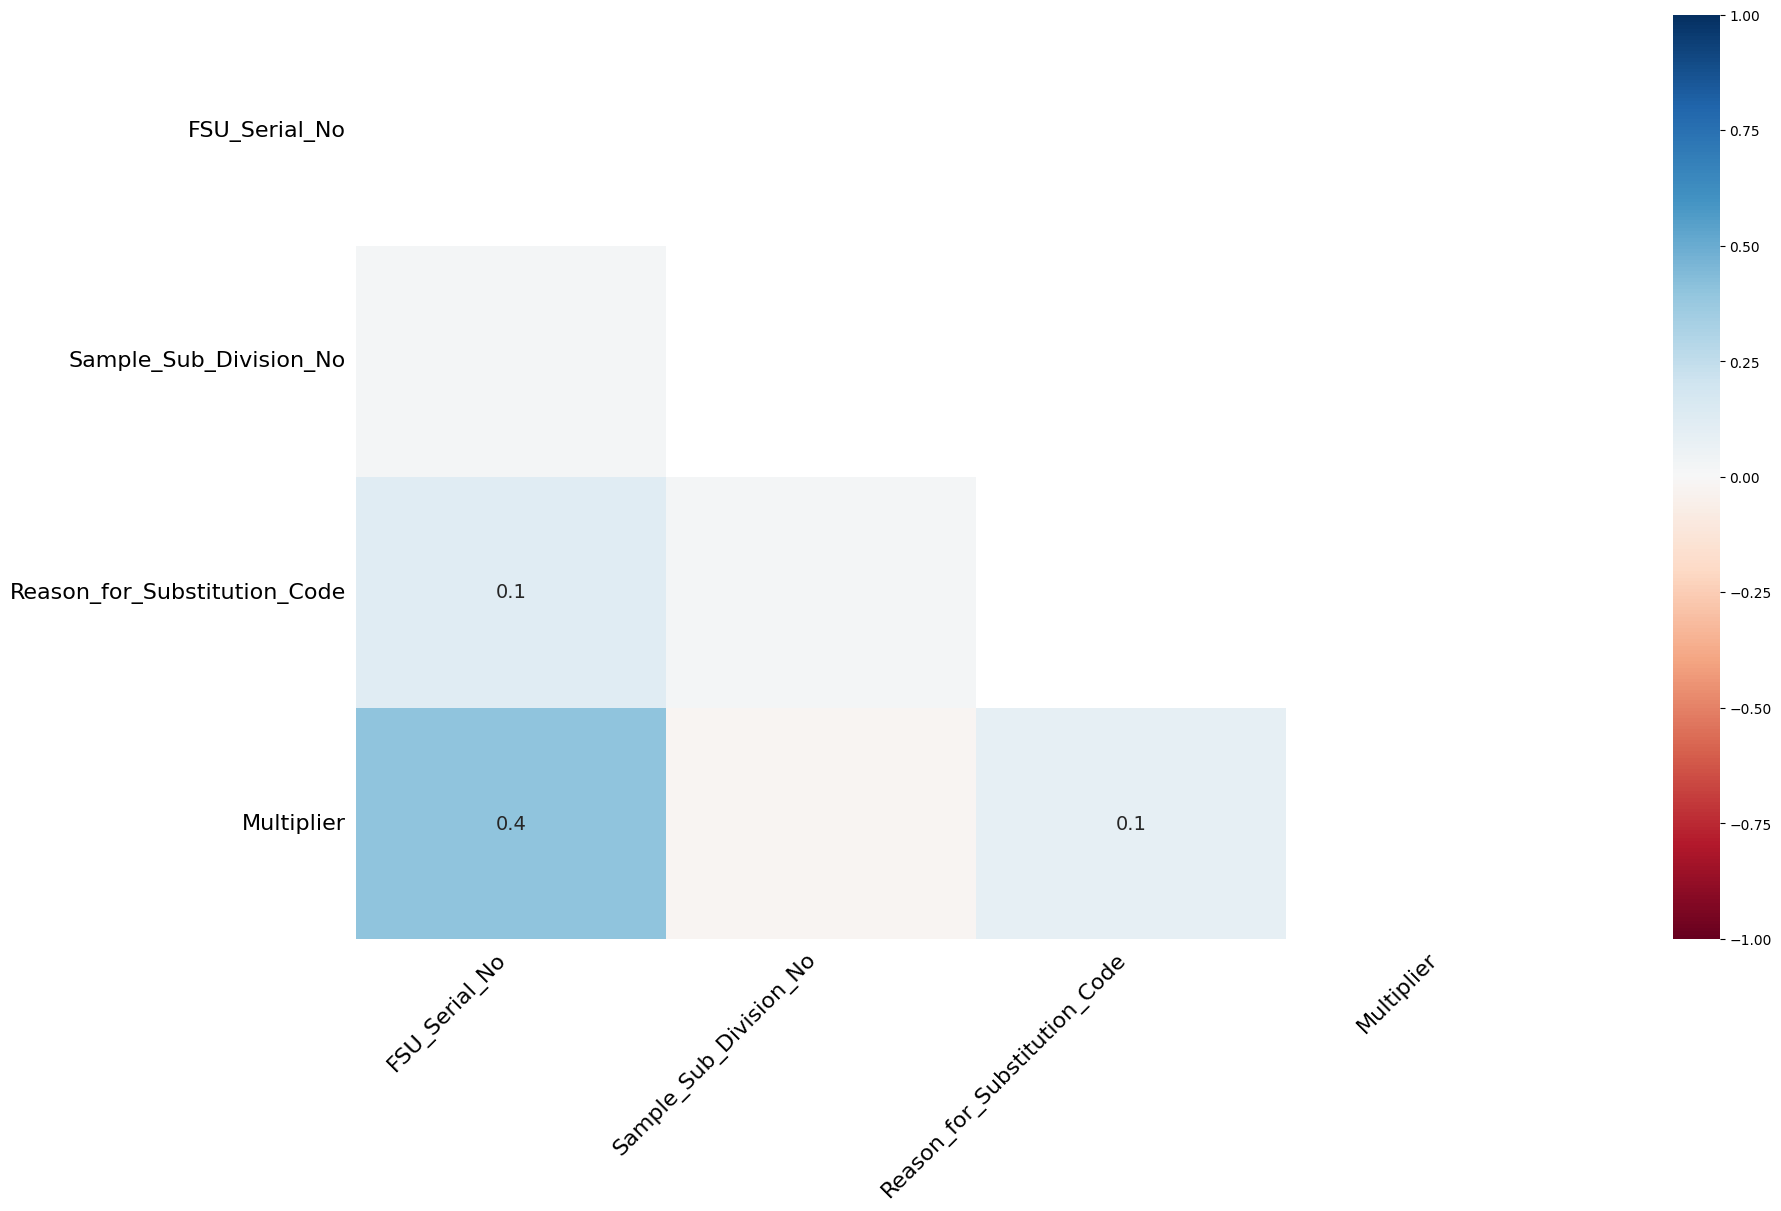

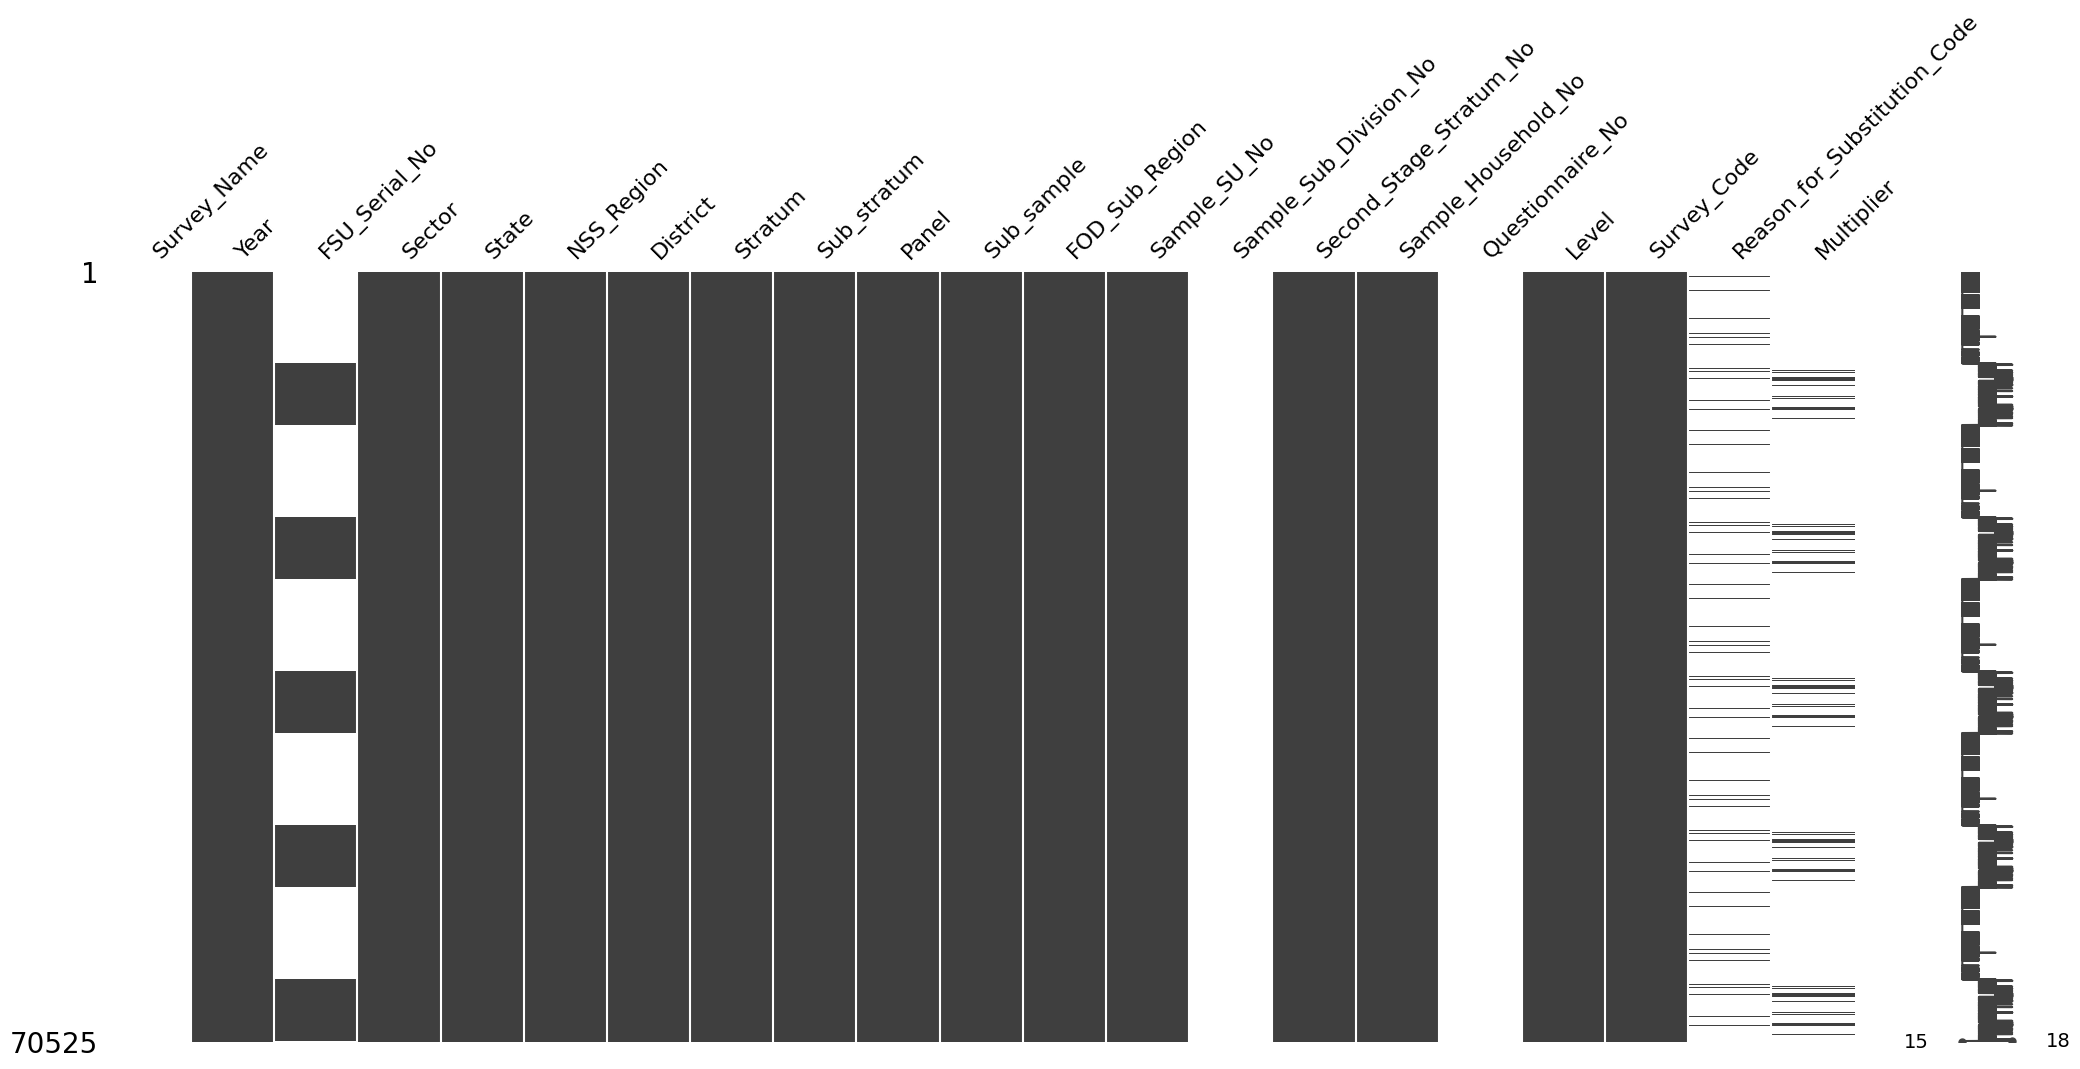

In [1]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-01\data\lev-01_merged.parquet"

# import 
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

# Functions define for plot null
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

# Import Data and filter
pdf = pl.read_parquet(path)
display(f"Before Filtering the shape {pdf.shape}")
pdf = pdf.filter(
    pl.col('State') == '23'
)
display(f"After Filter the shape {pdf.shape}")

# ------------------------ Our useful variables are 
# ===============================



display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

display(pdf.schema)

# MP Data
mp_df = pdf.to_pandas()

print("Percentage of null values ")
for col in mp_df.columns:
    null_percentage = (mp_df[col].isnull().sum() / mp_df.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")
    
plot_null(mp_df)